In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MSCI資料處理

In [2]:
df_msci = pd.read_csv('/Users/Kang/Desktop/historyIndex.csv', index_col = 'Date')
df_msci = df_msci.set_index(pd.to_datetime(df_msci.index))

In [3]:
#原本資料裡的comma無法被正確辨識，所以要先把它拿掉
column = 'WORLD Standard (Large+Mid Cap) '
df_msci[column] = df_msci[column].apply(lambda x: float(x.split()[0].replace(',', '')))

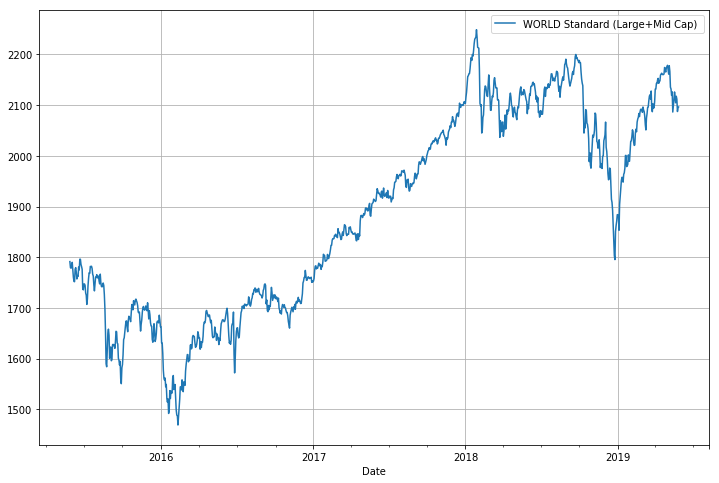

In [4]:
df_msci.plot(figsize=(12,8), grid = True)

In [5]:
df_msci_m = df_msci.resample('M').mean()

# TWII資料處理

In [6]:
df_twii = pd.read_csv('/Users/Kang/Desktop/台股加權.csv', index_col = 'Date')
df_twii = df_twii.set_index(pd.to_datetime(df_twii.index))

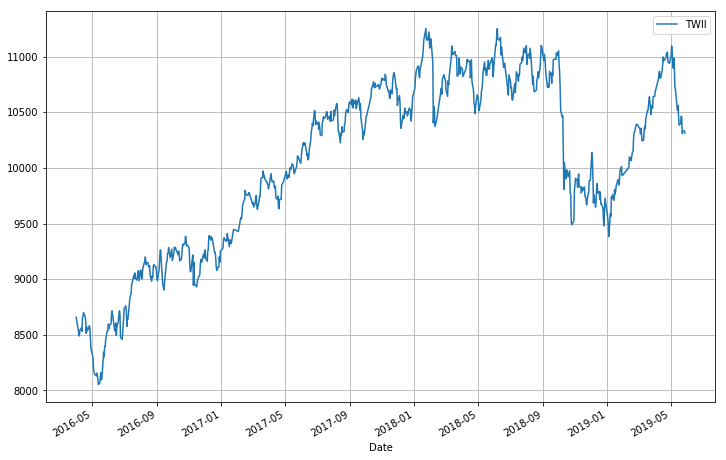

In [7]:
df_twii.plot(figsize=(12,8), grid = True)

In [8]:
df_twii_m = df_twii.resample('M').mean()

# merge兩個月資料

In [9]:
'''
start = df_twii_m.index[(df_twii_m.index.year == 2016) & (df_twii_m.index.month == 4)]
end = df_twii_m.index[(df_twii_m.index.year == 2019) & (df_twii_m.index.month == 3)]
df_msci_m = df_msci_m.loc[(df_msci_m.index.date >= start.date) & (df_msci_m.index.date <= end.date)]
df_twii_m = df_twii_m.loc[(df_twii_m.index.date >= start.date) & (df_twii_m.index.date <= end.date)]

merge = pd.merge(df_msci_m, df_twii_m, on = df_twii_m.index)
merge = merge.rename(index=str, columns={"key_0": "Date"})
merge = merge.set_index('Date')
merge = merge.set_index(pd.DatetimeIndex(merge.index))
'''

'\nstart = df_twii_m.index[(df_twii_m.index.year == 2016) & (df_twii_m.index.month == 4)]\nend = df_twii_m.index[(df_twii_m.index.year == 2019) & (df_twii_m.index.month == 3)]\ndf_msci_m = df_msci_m.loc[(df_msci_m.index.date >= start.date) & (df_msci_m.index.date <= end.date)]\ndf_twii_m = df_twii_m.loc[(df_twii_m.index.date >= start.date) & (df_twii_m.index.date <= end.date)]\n\nmerge = pd.merge(df_msci_m, df_twii_m, on = df_twii_m.index)\nmerge = merge.rename(index=str, columns={"key_0": "Date"})\nmerge = merge.set_index(\'Date\')\nmerge = merge.set_index(pd.DatetimeIndex(merge.index))\n'

In [10]:
merge = pd.merge(df_msci_m, df_twii_m, right_index=True, left_index=True)

# merge資料用兩個y軸畫圖

In [11]:
from IPython.core.pylabtools import figsize
figsize(12, 8)

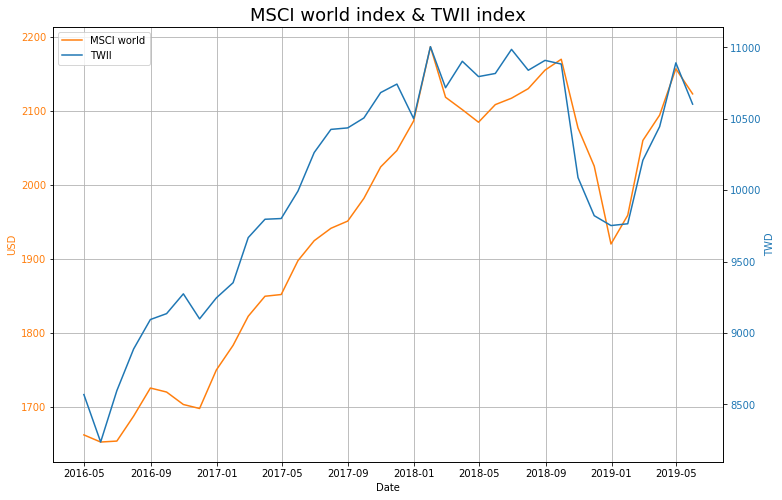

In [12]:
fig, ax = plt.subplots()

color1 = 'tab:orange'
color2 = 'tab:blue'

lns1 = ax.plot(merge['WORLD Standard (Large+Mid Cap) '], color=color1)
ax2 = ax.twinx()
lns2 = ax2.plot(merge['TWII'], color=color2)

# added these three lines
lns = lns1+lns2
#labs = [l.get_label() for l in lns]
labs = ['MSCI world', 'TWII']
ax.legend(lns, labs, loc='upper left')

ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('USD', color=color1)
ax2.set_ylabel('TWD', color=color2)

ax.tick_params(axis='y', labelcolor=color1)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('MSCI world index & TWII index', size = 18)
plt.show()

In [13]:
df_periodic_invest = pd.read_csv('/Users/Kang/Desktop/periodic_invest.csv', index_col = 0)
df_periodic_invest = df_periodic_invest.set_index(pd.to_datetime(df_periodic_invest.index))

In [14]:
merge_y_x = pd.merge(df_periodic_invest, merge, right_index=True, left_index=True)

In [15]:
merge_y_x

,Units,People,NT dollars,WORLD Standard (Large+Mid Cap),TWII
2016-04-30,646740,494755,3339348556,1662.570619,8567.991057
2016-05-31,647841,491540,3320066240,1652.921818,8235.471029
2016-06-30,626222,482408,3220463290,1654.215636,8595.608496
2016-07-31,620540,478237,3204103712,1687.937905,8887.414713
2016-08-31,629334,479580,3270332585,1725.865870,9093.748556
2016-09-30,621588,476494,3227641830,1720.435409,9135.156576
2016-10-31,619047,473936,3180583198,1703.611810,9273.735986
2016-11-30,615909,470553,3205094427,1698.217091,9098.386852
2016-12-31,606144,466241,3149472672,1750.186955,9245.263139
2017-01-31,472237,385447,2420542262,1783.519955,9351.713684


In [16]:
#merge_y_x.to_csv('/Users/Kang/Desktop/merge_data.csv')